# Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 

%matplotlib inline 

In [2]:
bridge_data = pd.read_csv('All_bridges_last_year_assessment_modified.csv')

In [3]:
bridge_data.head(5)

,Bridge No.,State Name,Owner Agency,Year Built,Average Daily Traffic,Material Type,No. of Spans,Bridge Length (m),Bridge Age (yr),Deck Area (m2),Inspection Date,Deck Condition,US_CODE
0,0,Alabama,State Highway Agency,2018,680.0,Prestressed Concrete,1,27.0,1,119.0,1/2/2019 0:00,9.0,AL
1,1,Alabama,State Highway Agency,2017,2017.0,Prestressed Concrete,1,7.0,2,18.0,6/2/2018 0:00,9.0,AL
2,2,Alabama,County Highway Agency,2017,16.0,Concrete,9,33.0,2,86.0,12/2/2017 0:00,8.0,AL
3,3,Alabama,State Highway Agency,2011,2000.0,Prestressed Concrete,4,49.0,8,250.0,9/2/2017 0:00,8.0,AL
4,4,Alabama,County Highway Agency,2017,7.0,Concrete,1,4.0,2,9.0,10/2/2017 0:00,9.0,AL


In [4]:
bridge_data.set_index('Bridge No.',inplace=True)

In [5]:
bridge_data.describe()

,Year Built,Average Daily Traffic,No. of Spans,Bridge Length (m),Bridge Age (yr),Deck Area (m2),Deck Condition
count,606137.000000,606137.000000,606137.000000,606137.000000,606137.000000,606137.000000,606137.000000
mean,1969.430262,7509.023274,2.708177,15.693150,49.796927,65.217845,6.333989
std,27.401015,21119.076765,5.047251,49.595032,27.559672,245.909007,1.365066
min,1765.000000,0.000000,0.000000,2.000000,-30.000000,0.000000,0.000000
25%,1953.000000,100.000000,1.000000,4.000000,28.000000,9.000000,6.000000
50%,1970.000000,650.000000,2.000000,8.000000,50.000000,23.000000,7.000000
75%,1991.000000,5633.000000,3.000000,16.000000,66.000000,62.000000,7.000000
max,2050.000000,999999.000000,999.000000,11824.000000,254.000000,34597.000000,9.000000


##### According with these results, it can be observed that there are some erroneous entries. For example, it is not possible having a bridge built on 2050 The same happens with the bridge age. Let's observe what is happening with those extremes in specific and by also looking at the distribution plot 

##### YEAR BUILT

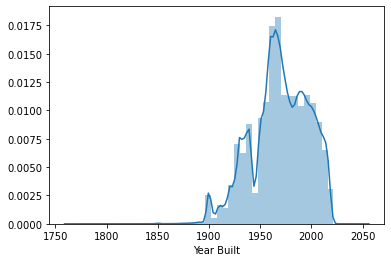

In [6]:
sns.distplot(bridge_data['Year Built'])

In [7]:
unborned_bridges=bridge_data[bridge_data['Year Built']>=2020]

In [8]:
i=bridge_data[bridge_data['Year Built']>=2020].index
bridge_data.drop(i,inplace=True)

In [9]:
number_bridges_per_year=bridge_data['Year Built'].value_counts()

In [10]:
bar = px.bar(x=number_bridges_per_year.index,
             y=number_bridges_per_year.values,
             color=number_bridges_per_year.values,
             title='Number of bridges built per year')

bar.update_layout(xaxis_title='Year', 
                  yaxis_title='Number of bridges built',
                  coloraxis_showscale=False)
bar.show()

###### Investigate the oldest bridge

In [11]:
bridge_data[bridge_data['Year Built']==1765]

,State Name,Owner Agency,Year Built,Average Daily Traffic,Material Type,No. of Spans,Bridge Length (m),Bridge Age (yr),Deck Area (m2),Inspection Date,Deck Condition,US_CODE
Bridge No.,,,,,,,,,,,,
181503,Massachusetts,City or Municipal Highway Agency,1765,30800.0,Masonry,2,11.0,254,61.0,11/2/2018 0:00,7.0,MA


<h4>After doing some research of this bridge, it was found in wikipedia a small discription of this bridge</h4>
<a href="https://en.wikipedia.org/wiki/Choate_Bridge#:~:text=Choate%20Bridge%20(1764)%20is%20a,probably%20the%20oldest%20in%20Massachusetts">Check in wikipedia</a>
<img src="Choate_Bridge.jpg">

###### BRIDGE LENGTH

In [12]:
bridge_len_info=bridge_data['Bridge Length (m)'].value_counts().head(100)

In [13]:
(bridge_len_info/len(bridge_data['Bridge Length (m)'])*100).sum()

98.46731537667085

In [14]:
bridge_len_info

3.0      71239
4.0      56985
2.0      50713
5.0      41636
6.0      39037
         ...  
92.0       148
94.0       140
102.0      137
106.0      135
101.0      134
Name: Bridge Length (m), Length: 100, dtype: int64

In [15]:
bar = px.bar(x=bridge_len_info.index,
             y=bridge_len_info.values,
             color=bridge_len_info.values,
             title='Length of bridges')

bar.update_layout(xaxis_title='Bridge Length(m)', 
                  yaxis_title='Number of bridges',
                  coloraxis_showscale=False)
bar.show()

<p> At least 98% of the bridges present a length under 100m. The remaining 2% might present cases of special bridges with a special construction type

###### Investigate the longest bridge

In [16]:
bridge_data[bridge_data['Bridge Length (m)']==11824]

,State Name,Owner Agency,Year Built,Average Daily Traffic,Material Type,No. of Spans,Bridge Length (m),Bridge Age (yr),Deck Area (m2),Inspection Date,Deck Condition,US_CODE
Bridge No.,,,,,,,,,,,,
170639,Louisiana,Other Local Agencies,1965,18830.0,Steel,1,11824.0,54,34597.0,10/2/2017 0:00,7.0,LA


# The longest bridge can be consulted in here 
<a href="https://en.wikipedia.org/wiki/Lake_Pontchartrain_Causeway#Guinness_World_Records_controversy">Check in wikipedia</a>
<p>This bridge is said to have a bridge length of around 40 km. In the database only it is recorded around 12km with an unique span!! At least, a little strange!</p>

###### Average Daily Traffic

In [17]:
bridge_data[bridge_data['Average Daily Traffic']==999999]
#This might be a mistake on the registration since the len of the database is 606131 and this is the only registration with this 
#value, thus this row is dropped

,State Name,Owner Agency,Year Built,Average Daily Traffic,Material Type,No. of Spans,Bridge Length (m),Bridge Age (yr),Deck Area (m2),Inspection Date,Deck Condition,US_CODE
Bridge No.,,,,,,,,,,,,
329949,Ohio,State Highway Agency,1970,999999.0,Steel Continuous,5,22.0,49,167.0,6/2/2018 0:00,9.0,OH


In [18]:
i=bridge_data[bridge_data['Average Daily Traffic']==999999].index
bridge_data.drop(i,inplace=True)


###### No. of Spans

In [19]:
bridge_data[bridge_data['No. of Spans']==999]
# Again, this record does not make any sense, hence it is droped too 

,State Name,Owner Agency,Year Built,Average Daily Traffic,Material Type,No. of Spans,Bridge Length (m),Bridge Age (yr),Deck Area (m2),Inspection Date,Deck Condition,US_CODE
Bridge No.,,,,,,,,,,,,
533699,Washington,City or Municipal Highway Agency,1917,37300.0,Steel,999,57.0,103,412.0,7/2/2006 0:00,5.0,WA


In [20]:
i=bridge_data[bridge_data['No. of Spans']==999].index
bridge_data.drop(i,inplace=True)

In [21]:
bridge_spans_info=bridge_data['No. of Spans'].value_counts().head(10)

In [22]:
(bridge_spans_info/len(bridge_data['No. of Spans'])*100).sum()

98.14377916069981

In [23]:
bar = px.bar(x=bridge_spans_info.index,
             y=bridge_spans_info.values,
             color=bridge_spans_info.values,
             title='Number of spans of the bridges')

bar.update_layout(xaxis_title='Bridge Span', 
                  yaxis_title='Number of bridges',
                  coloraxis_showscale=False)
bar.show()

<p> 98% of the bridges present a span less than 10m </p> 
<p> Maybe there is a correlation between the number of spans and the length of the bridge </p>

In [24]:
mask = np.zeros_like(bridge_data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

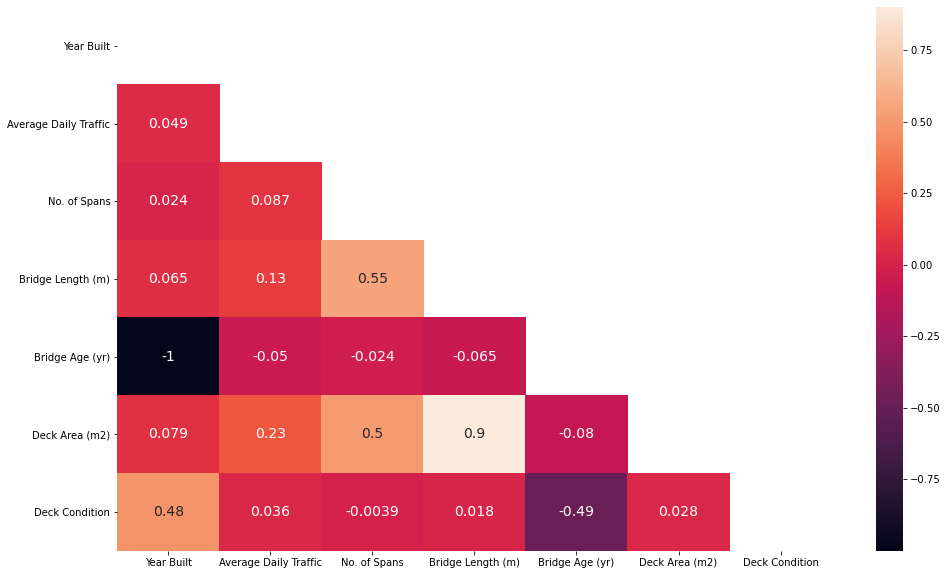

In [25]:
plt.figure(figsize=(16,10))
sns.heatmap(bridge_data.corr(),mask=mask, annot=True, annot_kws={'size':14})

plt.show()

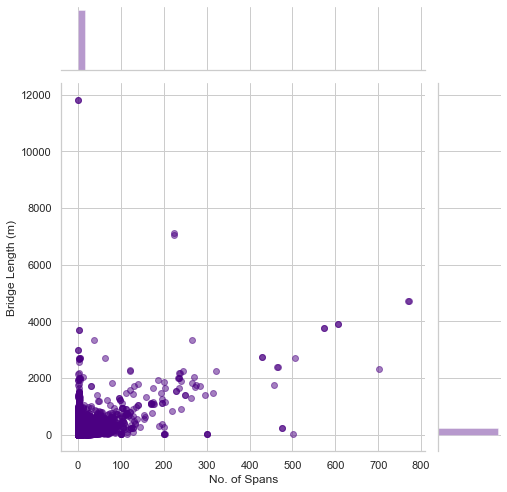

In [26]:
sns.set()
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.jointplot(bridge_data['No. of Spans'],bridge_data['Bridge Length (m)'], height=7, color='indigo', joint_kws={'alpha':0.5})
plt.show()

In [27]:
# sns.pairplot(bridge_data)

##### After these analysis, since 98% of the bridges present less than 100m and less than 10 spans, lets drop those bridges with higher spans and bridge overall length

In [28]:
i = bridge_data[bridge_data['Bridge Length (m)']>100].index

In [29]:
bridge_data.drop(i,inplace=True)

In [30]:
i = bridge_data[bridge_data['No. of Spans']>=10].index

In [31]:
bridge_data.drop(i,inplace=True)

In [32]:
bridge_data.describe()

,Year Built,Average Daily Traffic,No. of Spans,Bridge Length (m),Bridge Age (yr),Deck Area (m2),Deck Condition
count,587642.000000,587642.000000,587642.000000,587642.000000,587642.000000,587642.000000,587642.000000
mean,1969.336137,7152.278015,2.316113,11.785924,49.891858,46.587819,6.336656
std,27.478224,20592.299267,1.556649,12.113667,27.637041,69.444929,1.368899
min,1765.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,1953.000000,96.000000,1.000000,4.000000,28.000000,9.000000,6.000000
50%,1970.000000,592.000000,2.000000,8.000000,50.000000,22.000000,7.000000
75%,1991.000000,5195.000000,3.000000,15.000000,66.000000,57.000000,7.000000
max,2019.000000,968850.000000,9.000000,100.000000,254.000000,7125.000000,9.000000


# No. of bridges built per state

In [33]:
bridges_per_state=bridge_data['State Name'].value_counts()

In [34]:
bar = px.bar(x=bridges_per_state.index,
             y=bridges_per_state.values,
             color=bridges_per_state.values,
             title='Number of bridges built per state')

bar.update_layout(xaxis_title='State', 
                  yaxis_title='Number of bridges',
                  coloraxis_showscale=False)
bar.show()

### Top 10 states with more bridges built  

In [35]:
top10_bridges_per_state = bridges_per_state[:10]

In [36]:
top10_bridges_per_state

Texas             39747
Ohio              35148
Iowa              27750
Illinois          27744
Missouri          26716
North Carolina    25962
Pennsylvania      25122
California        23505
Oklahoma          22714
Kansas            20601
Name: State Name, dtype: int64

In [37]:
bar = px.bar(x=top10_bridges_per_state.index,
             y=top10_bridges_per_state.values,
             color=top10_bridges_per_state.values,
             title='Top 10 states with more Bridges built')

bar.update_layout(xaxis_title='State', 
                  yaxis_title='Number of bridges',
                  coloraxis_showscale=False)
bar.show()

# Evaluating the condition state of the bridge deck on the states

## The condition sate of the bridge deck is rated from 0 to 10 being 0 the worst and 10 the best condition

In [38]:
condition_state=bridge_data.groupby(['State Name'], as_index=False).agg({'Year Built':pd.Series.mean,
                                                                         'Deck Condition':pd.Series.mean})
condition_state['Year Built']=round(condition_state['Year Built'],0)
condition_state['Deck Condition']=round(condition_state['Deck Condition'],2)


In [39]:
bar = px.bar(x=condition_state['State Name'],
             y=condition_state['Deck Condition'],
#              color=condition_state['Deck Condition'],
#              color_continuous_scale='Bluered_r',
             title='Average condition state of the deck bridges per state')

bar.update_layout(xaxis_title='State', 
                  yaxis_title='Condition State',
                  coloraxis_showscale=False)
bar.show()

# Plotly Sunburst Chart: Combine State, Average Year, and Organisation

In [40]:
fig = px.sunburst(condition_state, path=['State Name', 'Year Built','Deck Condition'], values='Deck Condition',title='What is the average condition state per state?')
fig.show()

# Choropleth Map of Average Condition Rating of bridges per State


In [41]:
condition_state_code=bridge_data.groupby(['US_CODE'], as_index=False).agg({'Year Built':pd.Series.mean,
                                                                         'Deck Condition':pd.Series.mean})
condition_state_code['Year Built']=round(condition_state['Year Built'],0)
condition_state_code['Deck Condition']=round(condition_state['Deck Condition'],2)


In [42]:
data = dict(type='choropleth',
            colorscale = 'viridis',
            reversescale = True,
            locations = condition_state_code['US_CODE'],
            z = condition_state_code['Deck Condition'],
            locationmode = 'USA-states',
            text = condition_state_code['Year Built'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':"Average Deck Condition"}
            ) 

layout = dict(title = 'Average Condition Rating of deck bridges per State in the US',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

choromap = go.Figure(data = [data],layout = layout)
plot(choromap)

'temp-plot.html'

#### We can observe that the condition state in average per each state is quite equal and it is placed around 6 which denotest that in general the bridge decks already present some signs of degradation 



### Condition State 0 corresponds to an inactive bridge. Let's see how many inactive bridges we have in all states 

In [43]:
inactive_bridges=bridge_data[bridge_data['Deck Condition']==0]['Deck Condition'].count()
print(f'There are according with this database {inactive_bridges} inactive bridges in all states')

There are according with this database 4714 inactive bridges in all states


In [44]:
inactive_bridges_perstate=bridge_data[bridge_data['Deck Condition']==0]['State Name'].value_counts()

In [45]:
top10_states_inactive_bridges=inactive_bridges_perstate[:10]

In [46]:
bar = px.bar(x=top10_states_inactive_bridges.index,
             y=top10_states_inactive_bridges.values,
             color=top10_states_inactive_bridges.values,
             title='Top 10 states with more Bridges Inactive')

bar.update_layout(xaxis_title='State', 
                  yaxis_title='Number of bridges',
                  coloraxis_showscale=False)
bar.show()

In [47]:
## Since they are inactive lets drop those entries
i=bridge_data[bridge_data['Deck Condition']==0].index
bridge_data.drop(i,inplace=True)

## Let's now observe the condition per material design

In [48]:
# sns.pairplot(bridge_data,hue='Material Type')

In [49]:
bridge_data[bridge_data['Material Type']=='Other Material Main Span OR No Approach or Second Span Type']
# We don't know exactly what type of material this is, so let's drop these entries
i=bridge_data[bridge_data['Material Type']=='Other Material Main Span OR No Approach or Second Span Type'].index
bridge_data.drop(i,inplace=True)

In [50]:
condition_material=bridge_data.groupby(['Material Type'], as_index=False).agg({'Deck Condition':pd.Series.mean,
                                                                               'Year Built':pd.Series.mean,})
condition_material

,Material Type,Deck Condition,Year Built
0,Concrete,6.286018,1960.915495
1,Concrete Continuous,6.409006,1968.942398
2,Masonry,5.936214,1905.769547
3,Prestressed Concrete,6.902851,1985.802090
4,Prestressed Concrete Continuous,6.903323,1991.741876
5,Steel,6.041983,1958.707449
6,Steel Continuous,6.372982,1971.742958
7,Wood or Timber,5.805582,1960.038698


In [51]:
bridge_data['Material Type'].value_counts()

Steel                              159849
Prestressed Concrete               144242
Concrete                           102172
Steel Continuous                    55882
Concrete Continuous                 54009
Wood or Timber                      38839
Prestressed Concrete Continuous     27173
Masonry                               486
Name: Material Type, dtype: int64

#### The main materials used in a bridge construction are Steel, Concrete, Wood or Timber, Masonry and Pre-stressed concrete. Let's merge the Steel Continous and Concrete continuos in Steel and Concrete Respectively

In [52]:
bridge_data['Material Type'].replace('Steel Continuous', 'Steel', inplace=True)

In [53]:
bridge_data['Material Type'].replace('Concrete Continuous', 'Concrete', inplace=True)

In [54]:
bridge_data['Material Type'].replace('Prestressed Concrete Continuous', 'Prestressed Concrete', inplace=True)

In [55]:
condition_material=bridge_data.groupby(['Material Type'], as_index=False).agg({'Deck Condition':pd.Series.mean,
                                                                               'Year Built':pd.Series.mean,})
condition_material

,Material Type,Deck Condition,Year Built
0,Concrete,6.328548,1963.691281
1,Masonry,5.936214,1905.769547
2,Prestressed Concrete,6.902926,1986.743675
3,Steel,6.127724,1962.084109
4,Wood or Timber,5.805582,1960.038698


In [56]:
bridge_data['Material Type'].value_counts()

Steel                   215731
Prestressed Concrete    171415
Concrete                156181
Wood or Timber           38839
Masonry                    486
Name: Material Type, dtype: int64

In [57]:
fig = px.pie(bridge_data['Material Type'].value_counts().index,
values=bridge_data['Material Type'].value_counts().values,
title="Percentage of bridge decks per material",
names=bridge_data['Material Type'].value_counts().index,
hole=0.6,
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

##### It is noticed that the best condition rely on presstressed concrete bridges. The worst condition states rely on masonry, wood or timber bridges. Let's observe if per state we still have the same distribution in terms of condition state

##### MASONRY

In [58]:
mansory_data = bridge_data[bridge_data['Material Type']=='Masonry'].groupby(['State Name'], as_index=False).agg({'Deck Condition':pd.Series.mean})

In [59]:
bar = px.bar(x=mansory_data['State Name'],
             y=mansory_data['Deck Condition'],
             color=mansory_data['Deck Condition'],
             color_continuous_scale='Bluered_r',
             title='Average condition state of the deck mansory bridges per state')

bar.update_layout(xaxis_title='State', 
                  yaxis_title='Condition State',
                  coloraxis_showscale=False)
bar.show()

In [60]:
sorted_mansory=mansory_data.sort_values('Deck Condition',ascending=True)
top_10_worst=sorted_mansory.head(10)
top_10_worst

,State Name,Deck Condition
33,South Dakota,2.500000
19,Minnesota,4.000000
28,Oklahoma,4.888889
18,Michigan,5.000000
25,New Mexico,5.000000
13,Kansas,5.122449
12,Iowa,5.200000
40,Wisconsin,5.281250
34,Tennessee,5.333333
21,Missouri,5.333333


In [61]:
top_10_best=sorted_mansory.tail(10)
top_10_best

,State Name,Deck Condition
36,Utah,6.500000
3,California,6.666667
15,Maine,6.692308
29,Pennsylvania,6.766667
9,Hawaii,7.000000
1,Arizona,7.000000
0,Alabama,7.062500
8,Georgia,7.500000
35,Texas,7.684211
22,Montana,8.000000


##### CONCRETE

In [62]:
concrete_data = bridge_data[(bridge_data['Material Type']=='Concrete')].groupby(['State Name'], as_index=False).agg({'Deck Condition':pd.Series.mean})

In [63]:
bar = px.bar(x=concrete_data['State Name'],
             y=concrete_data['Deck Condition'],
             color=concrete_data['Deck Condition'],
             color_continuous_scale='Bluered_r',
             title='Average condition state of the deck concrete bridges per state')

bar.update_layout(xaxis_title='State', 
                  yaxis_title='Condition State',
                  coloraxis_showscale=False)
bar.show()

In [64]:
sorted_concrete=concrete_data.sort_values('Deck Condition',ascending=True)
top_10_worst=sorted_concrete.head(10)
top_10_worst

,State Name,Deck Condition
50,West Virginia,4.984293
39,Pennsylvania,5.429846
40,Puerto Rico,5.478431
20,Maine,5.716129
23,Michigan,5.718535
22,Massachusetts,5.814685
26,Missouri,5.820394
41,Rhode Island,5.875000
18,Kentucky,5.875244
34,North Carolina,5.878803


In [65]:
top_10_best=sorted_concrete.tail(10)
top_10_best

,State Name,Deck Condition
7,Delaware,6.602740
49,Washington,6.608834
45,Texas,6.639857
35,North Dakota,6.662745
3,Arkansas,6.674051
30,New Hampshire,6.682927
28,Nebraska,6.771667
9,Florida,6.784389
25,Mississippi,6.928024
47,Vermont,6.934211


##### STEEL

In [66]:
steel_data = bridge_data[(bridge_data['Material Type']=='Steel')].groupby(['State Name'], as_index=False).agg({'Deck Condition':pd.Series.mean})

In [67]:
bar = px.bar(x=steel_data['State Name'],
             y=steel_data['Deck Condition'],
             color=steel_data['Deck Condition'],
             color_continuous_scale='Bluered_r',
             title='Average condition state of the deck steel bridges per state')

bar.update_layout(xaxis_title='State', 
                  yaxis_title='Condition State',
                  coloraxis_showscale=False)
bar.show()

In [68]:
sorted_steel=steel_data.sort_values('Deck Condition',ascending=True)
top_10_worst=sorted_steel.head(10)
top_10_worst

,State Name,Deck Condition
40,Puerto Rico,5.280423
43,South Dakota,5.485286
51,Wisconsin,5.491658
16,Iowa,5.523759
50,West Virginia,5.579491
25,Mississippi,5.660181
24,Minnesota,5.672928
32,New Mexico,5.760286
0,Alabama,5.846112
37,Oklahoma,5.849276


In [69]:
top_10_best=sorted_steel.tail(10)
top_10_best

,State Name,Deck Condition
45,Texas,6.415064
17,Kansas,6.434686
29,Nevada,6.436000
21,Maryland,6.437193
8,District of Columbia,6.460674
30,New Hampshire,6.586667
7,Delaware,6.661654
1,Alaska,6.685851
9,Florida,6.799380
47,Vermont,6.854191


##### TIMBER 

In [70]:
timber_data = bridge_data[(bridge_data['Material Type']=='Wood or Timber')].groupby(['State Name'], as_index=False).agg({'Deck Condition':pd.Series.mean})

In [71]:
bar = px.bar(x=timber_data['State Name'],
             y=timber_data['Deck Condition'],
             color=timber_data['Deck Condition'],
             color_continuous_scale='Bluered_r',
             title='Average condition state of the deck Timber bridges per state')

bar.update_layout(xaxis_title='State', 
                  yaxis_title='Condition State',
                  coloraxis_showscale=False)
bar.show()

In [72]:
sorted_timber=timber_data.sort_values('Deck Condition',ascending=True)
top_10_worst=sorted_timber.head(10)
top_10_worst

,State Name,Deck Condition
10,Guam,3.000000
24,Mississippi,4.697289
36,Oklahoma,4.833258
42,Tennessee,5.187328
9,Georgia,5.210643
31,New Mexico,5.375887
0,Alabama,5.495616
18,Louisiana,5.538433
27,Nebraska,5.570402
2,Arizona,5.576577


In [73]:
top_10_best=sorted_timber.tail(10)
top_10_best

,State Name,Deck Condition
30,New Jersey,6.408907
29,New Hampshire,6.419540
28,Nevada,6.444444
26,Montana,6.454988
6,Connecticut,6.469388
14,Indiana,6.483911
7,Delaware,6.541667
22,Michigan,6.689922
45,Vermont,6.968085
32,New York,7.142553


##### PRESTRESSED CONCRETE

In [74]:
p_concrete_data = bridge_data[(bridge_data['Material Type']=='Prestressed Concrete')].groupby(['State Name'], as_index=False).agg({'Deck Condition':pd.Series.mean})

In [75]:
bar = px.bar(x=p_concrete_data['State Name'],
             y=p_concrete_data['Deck Condition'],
             color=p_concrete_data['Deck Condition'],
             color_continuous_scale='Bluered_r',
             title='Average condition state of the deck prestressed concrete bridges per state')

bar.update_layout(xaxis_title='State', 
                  yaxis_title='Condition State',
                  coloraxis_showscale=False)
bar.show()

In [76]:
sorted_p_concrete=p_concrete_data.sort_values('Deck Condition',ascending=True)
top_10_worst=sorted_p_concrete.head(10)
top_10_worst

,State Name,Deck Condition
40,Puerto Rico,5.980263
50,West Virginia,6.379007
4,California,6.422191
31,New Jersey,6.460938
12,Hawaii,6.461017
8,District of Columbia,6.470588
32,New Mexico,6.476230
52,Wyoming,6.477816
15,Indiana,6.543934
41,Rhode Island,6.550000


In [77]:
top_10_best=sorted_p_concrete.tail(10)
top_10_best

,State Name,Deck Condition
28,Nebraska,7.261949
0,Alabama,7.264182
42,South Carolina,7.275293
1,Alaska,7.345982
26,Missouri,7.360949
30,New Hampshire,7.468293
36,Ohio,7.494923
35,North Dakota,7.510112
20,Maine,7.592593
47,Vermont,7.787879


###### We can observe that the material can affect the classification of the condition state. Lets observe now the owner agencies

# Owner agency

In [78]:
# List of all owner agencies responsible for the condition assessment of bridges
bridge_data['Owner Agency'].value_counts()

State Highway Agency                                                     256758
County Highway Agency                                                    232982
City or Municipal Highway Agency                                          34588
Town or Township Highway Agency                                           29389
U.S. Forest Service                                                        8404
State Toll Authority                                                       7576
National Park Service                                                      2622
Other Local Agencies                                                       1487
Bureau of Indian Affairs                                                   1242
Other State Agencies                                                       1152
Railroad                                                                   1145
Local Toll Authority                                                        948
Army                                    

In [79]:
# materials=bridge_data['Material Type'].unique()

In [80]:
# for material in materials:
#     owner_assessement=bridge_data[(bridge_data['Material Type']==material)].groupby(['Owner Agency'], as_index=False).agg({'Deck Condition':pd.Series.mean})
#     bar = px.bar(x=owner_assessement['Owner Agency'],
#                  y=owner_assessement['Deck Condition'],
#                  color=owner_assessement['Deck Condition'],
#                  color_continuous_scale='Bluered_r',
#                  title=f'Average condition state of the deck {material} bridges per owner agency')

#     bar.update_layout(xaxis_title='Owner Agency', 
#                       yaxis_title='Deck Condition',
#                       coloraxis_showscale=False)
#     bar.show()

In [81]:
owner_assessement=bridge_data[(bridge_data['Material Type']=='Prestressed Concrete')].groupby(['Owner Agency'], as_index=False).agg({'Deck Condition':pd.Series.mean})

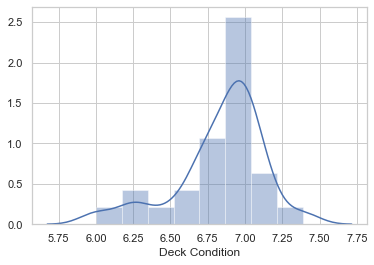

In [82]:
sns.distplot(owner_assessement['Deck Condition'])

In [83]:
owner_assessement['Deck Condition'].describe()

count    27.000000
mean      6.834577
std       0.301732
min       6.000000
25%       6.731809
50%       6.908321
75%       7.000000
max       7.388889
Name: Deck Condition, dtype: float64

###### We can observe that the different owner agencies tend to classify the bridges under the same condition state. The standard deviation is low

# Number of bridges with a specific deck condition

In [84]:
bridges_per_condition=bridge_data['Deck Condition'].value_counts()

In [85]:
percentage=bridges_per_condition/len(bridge_data['Deck Condition'])*100

In [86]:
percentage

7.0    37.806787
6.0    24.875397
5.0    14.435375
8.0    13.104392
4.0     5.286689
9.0     2.322656
3.0     1.612112
2.0     0.442975
1.0     0.113618
Name: Deck Condition, dtype: float64

In [87]:
bar = px.bar(x=percentage.index,
             y=percentage.values,
             color=percentage.values,
             title='Percentage of deck bridges per condition state')

bar.update_layout(xaxis_title='Deck Condition', 
                  yaxis_title='Percentage',
                  coloraxis_showscale=False)
bar.show()

# Conclusions:

- we can observe that the most bridges are classified as 6 and 7. We observe that a very limited number of bridges are classified as 1,2,3,4 and 9. This might possess a problem in case we want build a machine learning model for classification of bridge condition state since they can be missclassified in 7 and 6. Moreover, this database only presents one inspection which turns very dificult to build a model for bridge classification because we don't know what happened in the past to the bridge and we are ending up having bridges with the same condition state from 1960's and 2000's. 

- Neverthless we can solve this problem by investigating on a different project, concerning time series, the inspections for all the years on the bridges. 